# Spam Classification using Machine Learning Algorithms

<p> Importing all the necessary libraries </p>

In [49]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from IPython.display import HTML, display

In [50]:
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
       'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
       'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab',
       'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
       'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
       'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
       'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total','spam']
#dataset = pd.read_csv('spambase.data',names = col_names);

<p> The code block creates column names that could be used on spambase dataset. </p>

In [51]:
dataset = pd.read_csv('spambase.data', names = column_names)

<p> Reading the spambase dataset csv file and inserting into pandas dataframe </p>

In [4]:
dataset.shape

(4601, 58)

<p> The dataset.shape allows us to see how many records and how many columns are in the dataset.</p>

In [5]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


<p> The code block above retrieves the first five records of spambase dataset with all the columns </p>

## Dataset Exploration

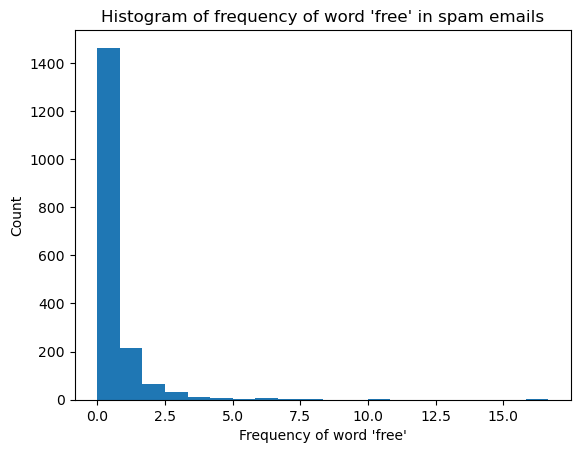

In [52]:

spam_data = dataset[dataset['spam'] == 1]
free_frequency = spam_data["word_freq_free"].tolist()
# Create a histogram of the frequency of the word "money" in the spam emails
plt.hist(free_frequency, bins=20)
plt.xlabel("Frequency of word 'free'")
plt.ylabel("Count")
plt.title("Histogram of frequency of word 'free' in spam emails")
plt.show()

<p> The code block above plots frequency of word "free" appearing on the spam mails </p>

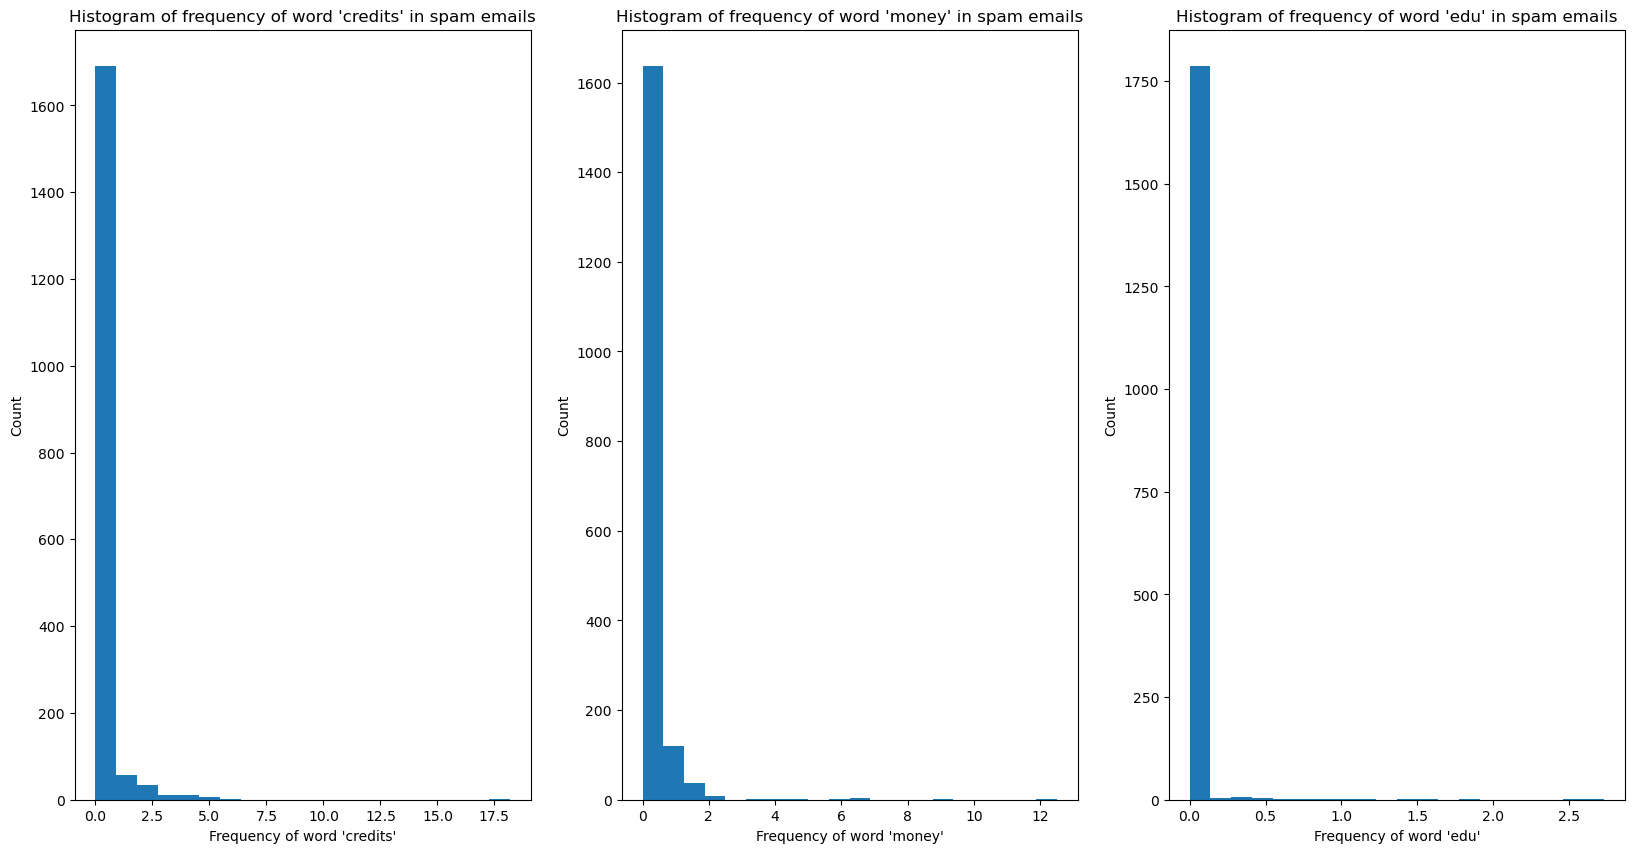

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to only include spam emails
spam_data = dataset[dataset["spam"] == 1]

# Get the frequency of the word "credits" and "money" in the spam emails
credits_freq = spam_data["word_freq_credit"].tolist()
money_freq = spam_data["word_freq_money"].tolist()
edu_freq = spam_data["word_freq_edu"].tolist()
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Plot the histogram for "credits" frequency in the first subplot
axs[0].hist(credits_freq, bins=20)
axs[0].set_xlabel("Frequency of word 'credits'")
axs[0].set_ylabel("Count")
axs[0].set_title("Histogram of frequency of word 'credits' in spam emails")

# Plot the histogram for "money" frequency in the second subplot
axs[1].hist(money_freq, bins=20)
axs[1].set_xlabel("Frequency of word 'money'")
axs[1].set_ylabel("Count")
axs[1].set_title("Histogram of frequency of word 'money' in spam emails")

#plot the historgram for word edu on third subplot
axs[2].hist(edu_freq, bins = 20)
axs[2].set_xlabel("Frequency of word 'edu'")
axs[2].set_ylabel("Count")
axs[2].set_title("Histogram of frequency of word 'edu' in spam emails")

# Show the plot
plt.show()

<p> Plotting three different frequency of words using python array indexing </p>

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order']


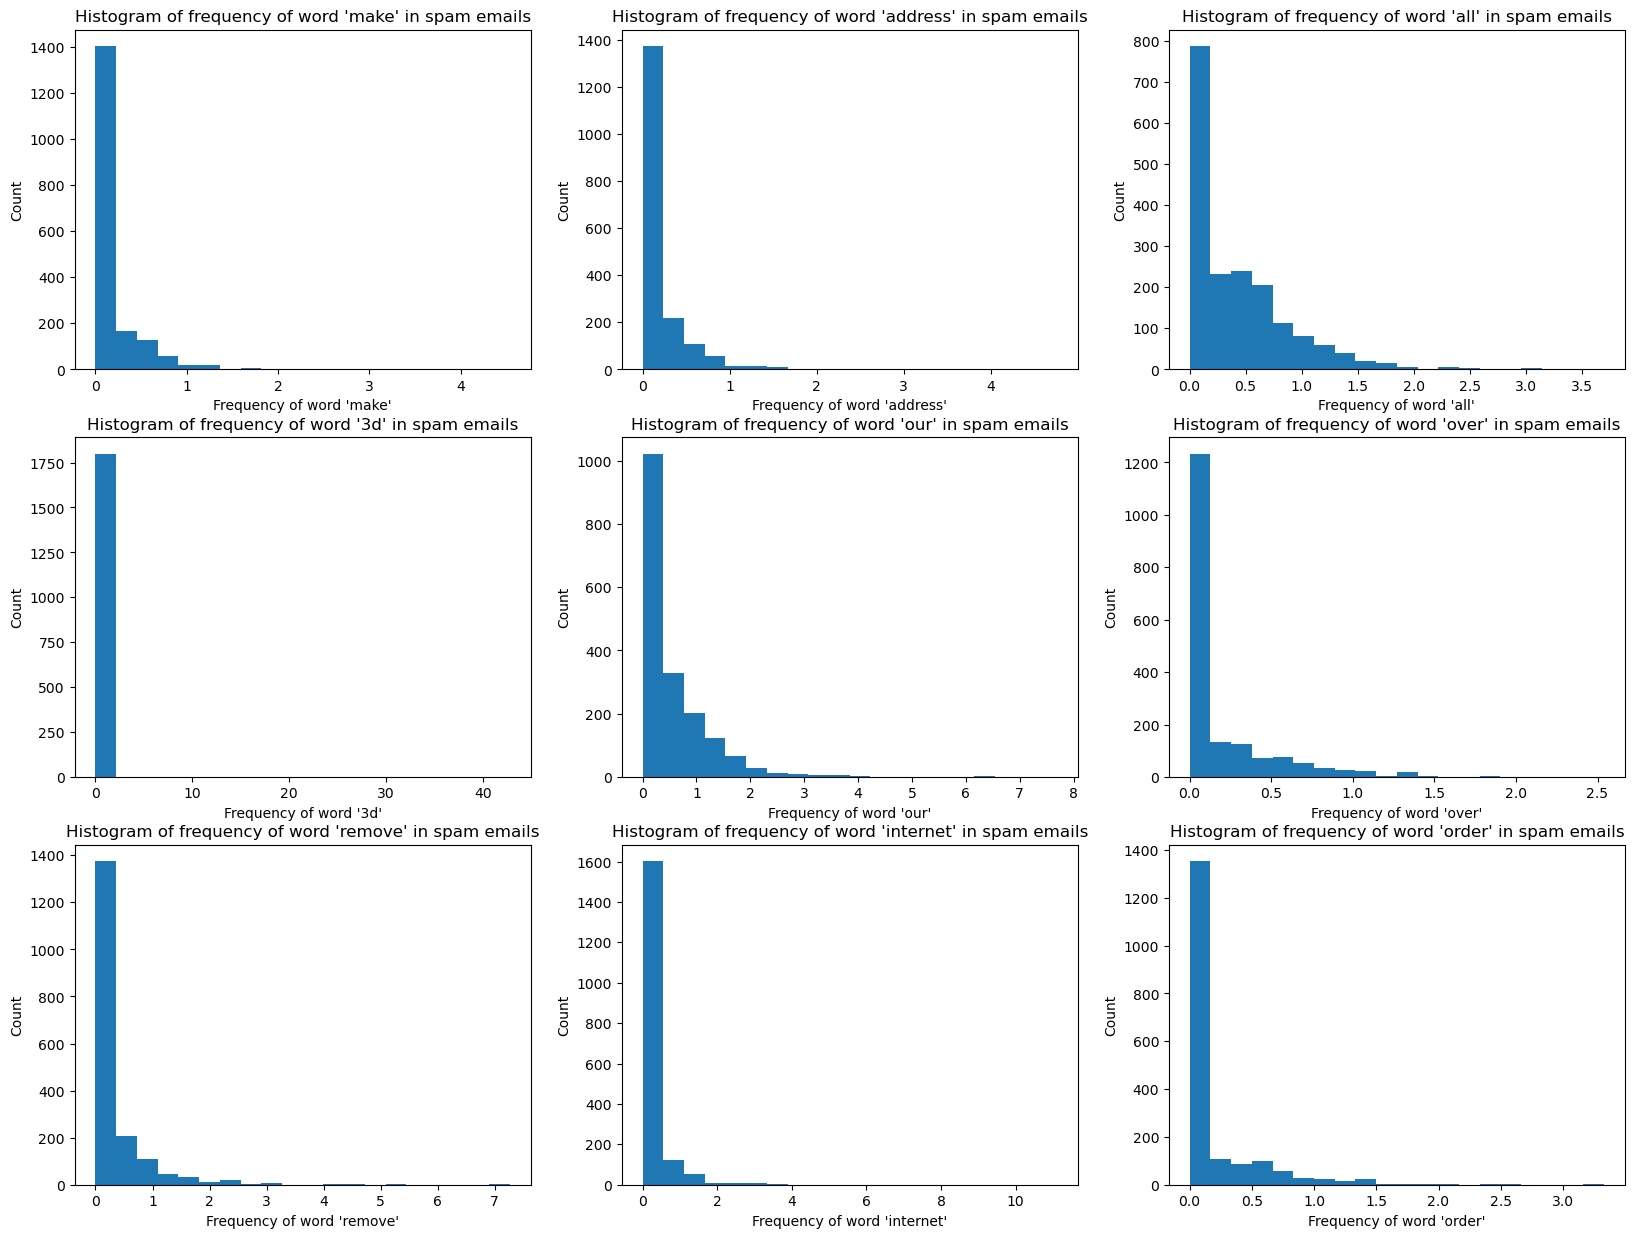

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to only include spam emails
spam_data = dataset[dataset["spam"] == 1]

# listing columns that stars with the word word_freq_
word_freq_cols = [col for col in spam_data.columns if col.startswith("word_freq_")][:9]
print(word_freq_cols)

# Create a figure with subplots for each word frequency column
fig, axs = plt.subplots(3,3, figsize=(20, 15))

# Plot histograms for each word frequency column
for i, col in enumerate(word_freq_cols):
    row = i // 3  # Determine the row of the subplot
    col_name = col.split('_')[-1]  # Get the last part of the column name
    word_freq = spam_data[col].tolist()
    axs[row, i % 3].hist(word_freq, bins=20)
    axs[row, i % 3].set_xlabel(f"Frequency of word '{col_name}'")
    axs[row, i % 3].set_ylabel("Count")
    axs[row, i % 3].set_title(f"Histogram of frequency of word '{col_name}' in spam emails")

# Show the plot
plt.show()

<p> Plotting more frequencies of words appearing on spam mails. </p>

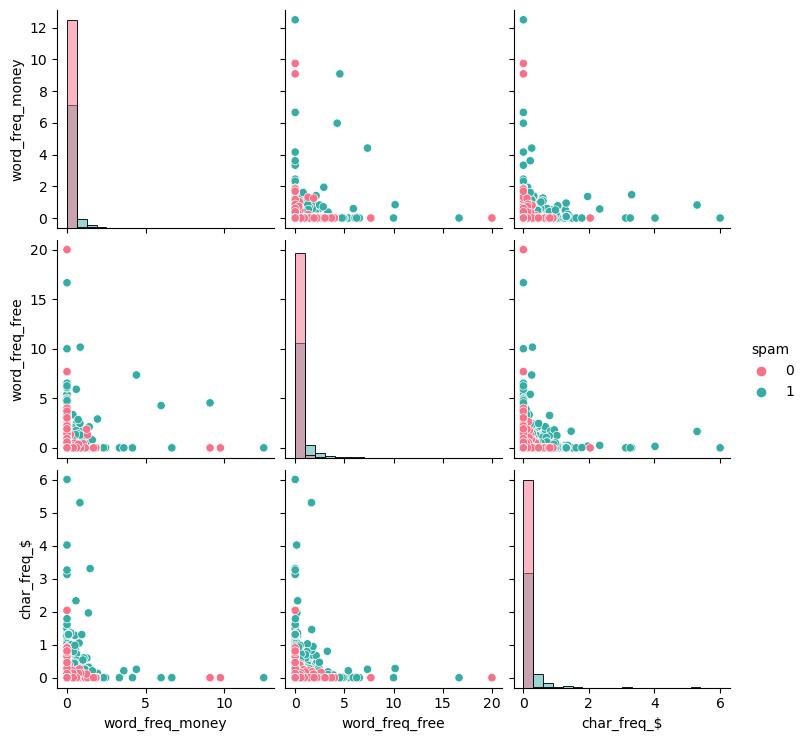

                 word_freq_money  word_freq_free  char_freq_$
word_freq_money         1.000000        0.096812     0.104691
word_freq_free          0.096812        1.000000     0.049953
char_freq_$             0.104691        0.049953     1.000000


In [9]:
import pandas as pd
import seaborn as sns

# Load the dataset
#data = pd.read_csv("spambase.data")

# Create a scatter plot matrix with correlation coefficients
sns.pairplot(dataset, hue="spam", diag_kind="hist", 
             diag_kws={"bins": 20}, palette="husl", 
             vars=["word_freq_money", "word_freq_free", "char_freq_$"])
plt.show()

# Calculate the correlation matrix
corr_matrix = dataset[["word_freq_money", "word_freq_free", "char_freq_$"]].corr()

# Print the correlation matrix
print(corr_matrix)

<p> From this pairplot we can see that there is a positive correlation between word “money” and character “$” and a weaker correlation for words money, free and character “$”. </p>

In [10]:
# checking the number of capital letters appearing on the spam mails
total_capital_letters = dataset[dataset.columns[-4:]]# retrieving the last four columns
total_capital_letters.columns = ['Capital_run_length_average', 'Capital_run_length_longest', 'Total_capital', 'Spam_label']
total_capital_letters

,Capital_run_length_average,Capital_run_length_longest,Total_capital,Spam_label
0,3.756,61,278,1
1,5.114,101,1028,1
2,9.821,485,2259,1
3,3.537,40,191,1
4,3.537,40,191,1
...,...,...,...,...
4596,1.142,3,88,0
4597,1.555,4,14,0
4598,1.404,6,118,0
4599,1.147,5,78,0


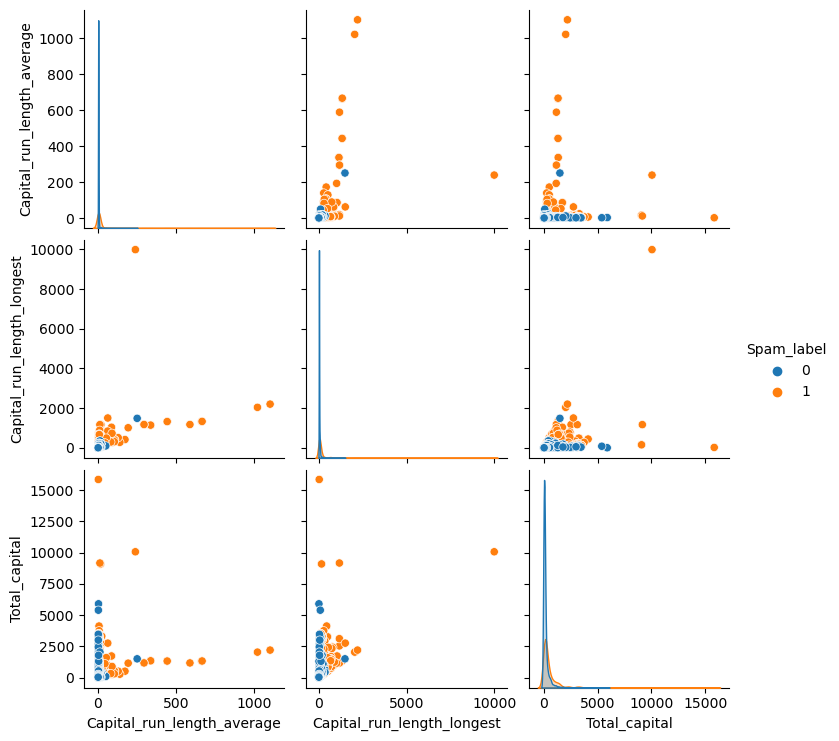

In [11]:
plt.rcParams['font.size'] = 10
sns.pairplot(data = total_capital_letters, hue = 'Spam_label')

<p> Pairplot showing the number of captial letters appearing on spam mails. </p>

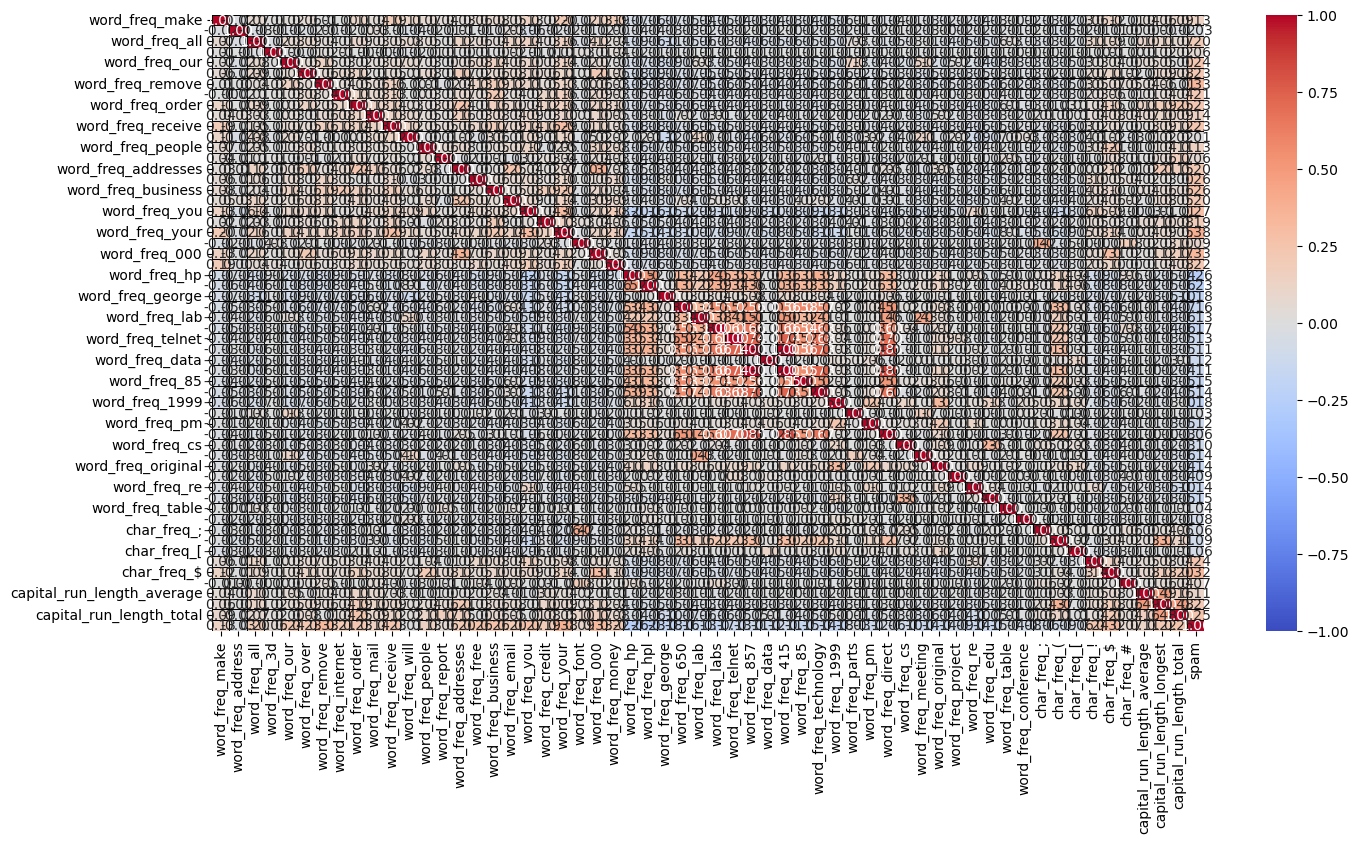

In [12]:
# check for data correlations using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(), vmin=-1,vmax=1, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black', fmt='.2f')
plt.show()

<p> Visualising the ratio of spam mails to ham mails in the dataset </p>

In [13]:
#calculate the amount of ham mails(0) and spam mails(1) in the dataset
spam_count = (dataset['spam'] == 1).sum()
ham_count = (dataset['spam'] == 0).sum()
print('Spam count: ', spam_count)
print('Ham count: ', ham_count)

Spam count:  1813
Ham count:  2788


In [14]:
# ratio of ham and spam in index
total_ratio=[spam_count, ham_count]

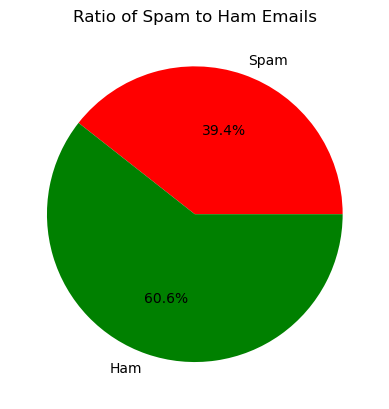

In [15]:
# plot the ham mails to spam mails in a pie chart
plt.pie(total_ratio, labels=["Spam", "Ham"],autopct='%1.1f%%', colors=["red", "green"])
plt.title("Ratio of Spam to Ham Emails")
plt.show()

## Data Preprocessing and Cleaning

In [16]:
# find any missing values in the dataset
dataset.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

<p> Splitting Predictors and target variable </p>

In [17]:

from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values #Taking everything but the spam value
y = dataset.iloc[:, -1:].values.ravel() #Taking the spam value
print(f"shape of x: {X.shape}")
print(f"shape of y: {y.shape}")

shape of x: (4601, 57)
shape of y: (4601,)


In [18]:
# scale the data with standard scaler
from sklearn.preprocessing import StandardScaler #importing the scaler
# scaler = StandardScaler()
# x = scaler.fit_transform(X)

In [19]:
print(f"x shape is: ", X.shape)
print(f"y shape is: ", y.shape)
print(y)

x shape is:  (4601, 57)
y shape is:  (4601,)
[1 1 1 ... 0 0 0]


<p> Creation of Logistic Regression Algorithm </p>

In [20]:
import numpy as np # importing numpy library

class LogisticRegression:
    # a constuctor method of the class Logistic regression
    def __init__(self, learning_rate=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        #the method above initialises the instance variables of the class
        #learning rate is indicating the learning rate to be used
        #num_iterations is indicating the number of iterations for the gradient descent
        #fit_intercept is a boolean value to check whether the algorithm should fit an intercept term or not
        #verbose is also a boolean value to print the loss value during the training
    
    def lg_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    # The method above adds an intercept term to the input matrix X. By doing so we can get a better probability of the target class better.
    
    def lg_sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        # the method above helps us to calculate the sigmoid function which maps the input value to a value between 0 and 1
        # the main role of sigmoid here is to transform the linear equation of the form w_0 + w_1*x_1...w_n*x_n to a probability value
        #between 0 and 1. here z is the linear combination of input features and w_0 to w_n is the model params
    
    def lg_loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        # the method computes the loss between the predicted probability value(h) and true variable y(in our case spam class).we are using the 
        #logistic loss function above
        # the reason to use this method is that we need to measure how close we are to the target variable. the goal here is to reduce the loss
        #function to a minimum
        # measures the difference between the predicted probability and the true value
    def fit(self, X, y):
        if self.fit_intercept: # if the fit_intercept is set to true
            X = self.lg_intercept(X) # adding a zero vector same length as the number of columns in X
            # the code above checks whether the fit_intercept is set to true
            #then adds a n intercept term(column of ones) to the input feature X
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        # the code above initialises the weights of LR to zeros
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            s = self.lg_sigmoid(z)
            gradient = np.dot(X.T, (s - y)) / y.size# calculating the gradient
            self.theta -= self.learning_rate * gradient# updating the weights
            
            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.lg_sigmoid(z)
                print(f'Loss: {self.lg_loss(h, y)} \t')
            # the code above sets verbose to true and prints the loss value every 10,000 iterations
    
    # the method below predicts whether the input given belongs to the class.
    def lg_predict_proba(self, X):
        if self.fit_intercept:
            X = self.lg_intercept(X)# setting intercept to true
    
        return self.lg_sigmoid(np.dot(X, self.theta)) # calculating the dot product of x with learned weights(theta) applies sigmoid on top
        # to get the probability of input belonging to positive class 
       

    # method below calculates the probability of positive class using predict_proba method.
    def predict(self, X, threshold=0.5):
        return self.lg_predict_proba(X) >= threshold # returns the probability of positive class
        #if the probability is bigger or equal to threshold then set to 1 and 0 otherwise


## Helper functions for training, testing and Plotting results

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split as split

<p>The function below helps to create different split ratios for the algorithms to be used </p>

In [22]:

def split_dataset(X, y, split_ratios):
    X_train, X_test, y_train, y_test = split(X, y, test_size= 1-split_ratios, random_state=42,shuffle=True, stratify=y) # split the dataset
    temp_scaler = StandardScaler() # scale the data
    X_train = temp_scaler.fit_transform(X_train) # fit the scaler to the training data
    X_test = temp_scaler.transform(X_test) # transform the test data
    return X_train, X_test, y_train, y_test # return the split data

<p> The code block below trains the models, predicts the model </p>

In [23]:
def model_train_predict(model,X_train, y_train, X_test):# train the model and predict the values
    model.fit(X_train, y_train)# fit the model
    training_prediction = model.predict(X_train)# predict on training set
    test_prediction = model.predict(X_test)# predict on test set
    return training_prediction, test_prediction

<p> The code block below calculates the evaluation metric using y_train and y_test </p>

In [24]:
def calculate_evalutation_metric(y_train, training_pred, y_test, testing_pred): # calculate the evaluation metrics
    train_accuracy = accuracy_score(y_train, training_pred)
    test_accuracy = accuracy_score(y_test, testing_pred)
    train_precision = precision_score(y_train, training_pred)
    test_precision = precision_score(y_test, testing_pred)
    train_recall = recall_score(y_train, training_pred)
    test_recall = recall_score(y_test, testing_pred)
    train_f1 = f1_score(y_train, training_pred)
    test_f1 = f1_score(y_test, testing_pred)
    return train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1

In [25]:
def printEvaluationmetrics(split_ratios, Evaluation_metric):
    train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1 = Evaluation_metric
    print(f"Split ratio:{ split_ratios:.2f}")
    print(f"Train Accuracy: {train_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    print(f"Train Precision: {train_precision:.3f}")
    print(f"Test Precision: {test_precision:.3f}")
    print(f"Train Recall: {train_recall:.3f}")
    print(f"Test Recall: {test_recall:.3f}")
    print(f"Train F1: {train_f1:.3f}")
    print(f"Test F1: {test_f1:.3f}")
    print(" ")
    print("")
    

<p> The code block below helps to plot the accuracy score of algorithms on both training set and test set using different split ratios </p>

In [26]:
def plotAccuracy_scores(split_ratios, train_accuracy_scores, test_accuracy_scores):
    plt.plot(split_ratios, train_accuracy_scores, label="Train Accuracy", marker='o', color='red', linestyle='dashed')
    plt.plot(split_ratios, test_accuracy_scores, label="Test Accuracy", marker='o', color='blue', linestyle='dashed')
    plt.xlabel("Split ratio")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Split ratio")
    plt.legend()
    plt.grid()
    plt.show()

<p> The code block below trains the models, predicts on the training and test sets and plot the accuracy rates </p>

In [27]:
def model_evaluation(model,X,y,split_ratios): # evaluate the model
    train_acc = [] # list to store the training accuracy
    test_acc = []# list to store the test accuracy
    for split_ratio in split_ratios: # loop through the split ratios
        X_train,X_test, y_train, y_test = split_dataset(X, y, split_ratio) # split the dataset
        training_pred, testing_pred = model_train_predict(model,X_train, y_train, X_test) # train the model and predict the values
        Evaluation_metric = calculate_evalutation_metric(y_train, training_pred, y_test, testing_pred) # calculate the evaluation metrics
        printEvaluationmetrics(split_ratio, Evaluation_metric) # print the evaluation metrics
        train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1 = Evaluation_metric
        train_acc.append(train_accuracy) # append the training accuracy to the list
        test_acc.append(test_accuracy)# append the test accuracy to the list
    plotAccuracy_scores(split_ratios, train_acc, test_acc) # plot the accuracy scores

        

<p> Initialising the Logistic Regression class with two parameters </p>

In [28]:
model1 = LogisticRegression(learning_rate=0.1,num_iter=100000)# initialising the model


<p> The code block below trains the model, predicts on the training and test set and plots the accuracy of each splitting </p>

Split ratio:0.50
Train Accuracy: 0.934
Test Accuracy: 0.919
Train Precision: 0.928
Test Precision: 0.904
Train Recall: 0.903
Test Recall: 0.888
Train F1: 0.916
Test F1: 0.896
 

Split ratio:0.60
Train Accuracy: 0.931
Test Accuracy: 0.922
Train Precision: 0.924
Test Precision: 0.919
Train Recall: 0.898
Test Recall: 0.880
Train F1: 0.911
Test F1: 0.899
 

Split ratio:0.70
Train Accuracy: 0.929
Test Accuracy: 0.928
Train Precision: 0.921
Test Precision: 0.921
Train Recall: 0.897
Test Recall: 0.895
Train F1: 0.909
Test F1: 0.908
 

Split ratio:0.80
Train Accuracy: 0.930
Test Accuracy: 0.928
Train Precision: 0.928
Test Precision: 0.921
Train Recall: 0.892
Test Recall: 0.895
Train F1: 0.910
Test F1: 0.908
 

Split ratio:0.90
Train Accuracy: 0.933
Test Accuracy: 0.915
Train Precision: 0.931
Test Precision: 0.895
Train Recall: 0.896
Test Recall: 0.890
Train F1: 0.913
Test F1: 0.893
 



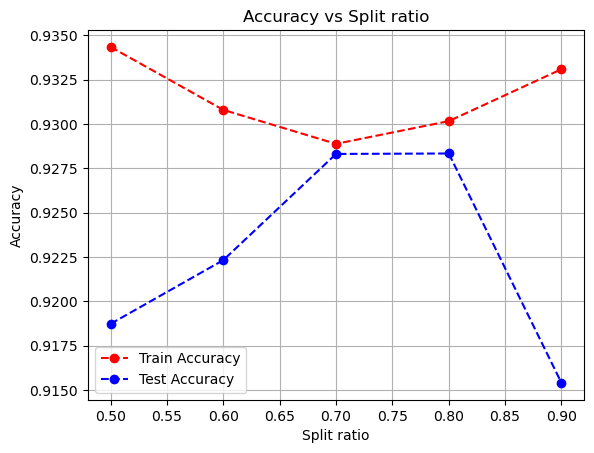

In [29]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(model1,X,y,split_ratios)

<p> The accuray plot above shows that the best accuracy was between 70-30 splitting and 80-20 splitting </p>

### Training Data Evaluation

|Algorithm| Splitting|Training Acc|training Precision|Training Recall|Training F1-score|
|--------------------|----------|-----|----|----|------|
|Logistic Regression| 50-50|0.934|0.928|0.903|0.916|
|Logistic Regression| 60-40|0.931|0.924|0.898|0.911|
|Logistic Regression| 70-30|0.929|0.921|0.897|0.909|
|Logistic Regression| 80-20|0.930|0.928|0.892|0.910|
|Logistic Regression| 90-10|0.933|0.931|0.896|0.913|

### Testing Data Evaluation

|Algorithm| Splitting| Testing Acc|Testing Precision|Testing Recall|Testing F1-score|
|--------------------|----------|-----|----|----|------|
|Logistic Regression| 50-50|0.919|0.904|0.888|0.896
|Logistic Regression| 60-40|0.922|0.919|0.880|0.899
|Logistic Regression| 70-30|0.928|0.921|0.895|0.908
|Logistic Regression| 80-20|0.928|0.921|0.895|0.908
|Logistic Regression| 90-10|0.915|0.895|0.890|0.893

<p>The table above shows the results of logistic regression on the test set with different split ratios. From this table we can observe that at 70-30 splitting and at 80-20 splitting we got the same values on evaluation metrics. </p>

(461,)
(461, 57)


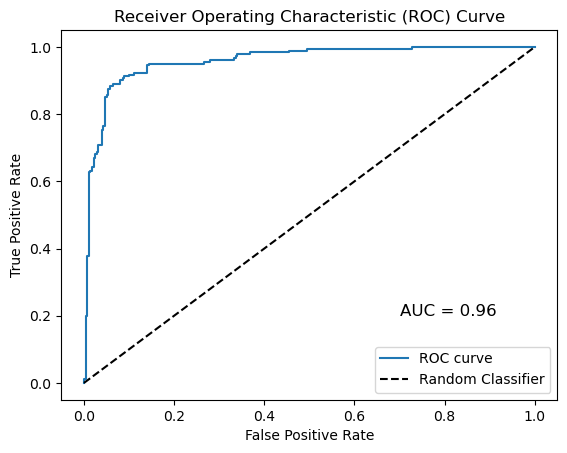

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])

# Assuming y_pred and y_true are the predicted and true labels for the test set
print(y_test.shape)
print(X_test.shape)
y_pred = model1.lg_predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

<p> Plotting the AUC-ROC curve for custom logistic regression. It has achieved 96% accuracy on discriminating spam mails and ham mails </p>

<p> The code block below initialises the Scikit-learn Logistic Regression with default parameters </p>

In [31]:
from sklearn.linear_model import LogisticRegression
sklearn_logistic = LogisticRegression( dual=False,fit_intercept=True, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

<p> Using different split ratios to evalute the model</p>

Split ratio:0.50
Train Accuracy: 0.930
Test Accuracy: 0.917
Train Precision: 0.927
Test Precision: 0.908
Train Recall: 0.892
Test Recall: 0.880
Train F1: 0.909
Test F1: 0.894
 

Split ratio:0.60
Train Accuracy: 0.927
Test Accuracy: 0.922
Train Precision: 0.924
Test Precision: 0.923
Train Recall: 0.889
Test Recall: 0.874
Train F1: 0.906
Test F1: 0.898
 

Split ratio:0.70
Train Accuracy: 0.929
Test Accuracy: 0.929
Train Precision: 0.923
Test Precision: 0.922
Train Recall: 0.893
Test Recall: 0.895
Train F1: 0.908
Test F1: 0.909
 

Split ratio:0.80
Train Accuracy: 0.931
Test Accuracy: 0.929
Train Precision: 0.930
Test Precision: 0.921
Train Recall: 0.891
Test Recall: 0.898
Train F1: 0.910
Test F1: 0.909
 

Split ratio:0.90
Train Accuracy: 0.934
Test Accuracy: 0.913
Train Precision: 0.932
Test Precision: 0.894
Train Recall: 0.898
Test Recall: 0.885
Train F1: 0.914
Test F1: 0.890
 



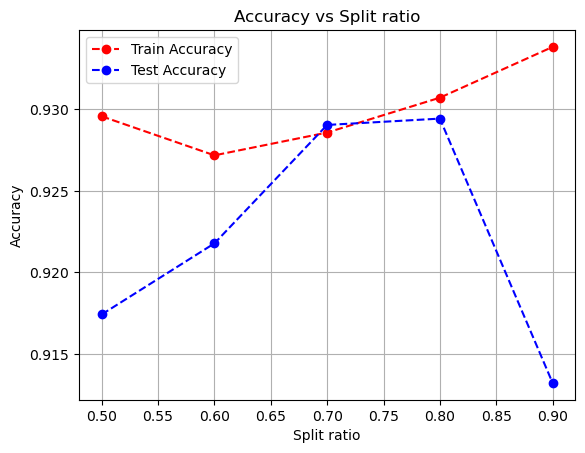

In [32]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(sklearn_logistic,X,y,split_ratios)

<p> The graph above shows that the best accuracy was at 80-20 splitting with 93% accuracy. </p>

#### Training Data Evaluation

|Algorithm| Splitting|Training Acc|Training Precision|Training Recall|Training F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Logistic Regression| 50-50|0.930|0.927|0.892|0.909|
|Sklearn Logistic Regression| 60-40|0.927|0.924|0.889|0.906|
|Sklearn Logistic Regression| 70-30|0.929|0.923|0.893|0.908|
|Sklearn Logistic Regression| 80-20|0.931|0.930|0.891|0.910|
|Sklearn Logistic Regression| 90-10|0.934|0.932|0.898|0.914|

#### Testing Data Evaluation
|Algorithm| Splitting| Testing Acc|Testing Precision|Testing Recall|Testing F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Logistic Regression| 50-50|0.917|0.908|0.880|0.894
|Sklearn Logistic Regression| 60-40|0.922|0.923|0.874|0.898
|Sklearn Logistic Regression| 70-30|0.929|0.922|0.895|0.909
|Sklearn Logistic Regression| 80-20|0.929|0.921|0.898|0.909
|Sklearn Logistic Regression| 90-10|0.913|0.894|0.885|0.890

<p> The table above shows the performance of scikit learn Logistic Regression on test data with different split ratios. On overall accuracy two different split ratios were best where 80-20 and 90-10 with 0.929. </p>

(461,)
(461, 57)


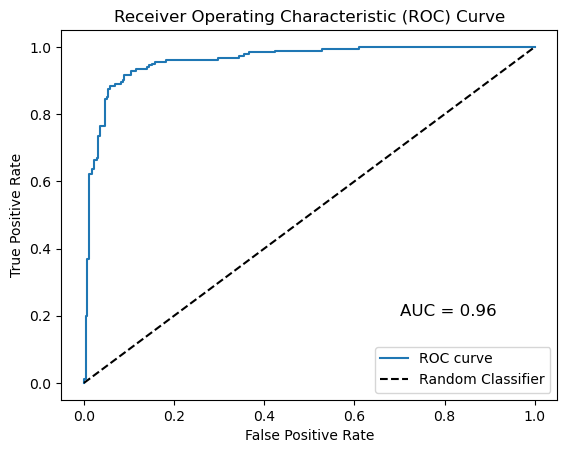

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score # import the roc_curve and roc_auc_score functions
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1]) # using the last split ratio to plot the ROC curve
print(y_test.shape)
print(X_test.shape)
y_pred1 = sklearn_logistic.predict_proba(X_test)[:, 1] # we only need the probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # calculate the ROC curve

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred1)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

<p> Plotting ROC-AUC curve on scikit-learn logistic regression which has achieved 96% accuracy in discriminating spam mails and ham mails. </p>

<p> Evaluating Logistic Regression with Scikit-learn library on test data based on best splitting and best metrics

|Algorithm| Best Splitting| Best Accuracy|Best Precision|Best Recall|Best F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Logistic Regression| 80-20|0.929|0.921|0.898|0.909
| Logistic Regression| 70-30|0.928|0.921|0.895|0.908

<p> The above table shows that Sklearn Logistic Regression did slightly better than my implementation. </p>

## Creation of Decision Tree

In [34]:
import numpy as np
class DecisionTree:

    # constructor for initialising the decision tree with one parameter max_depth
    def __init__(self, max_depth=None): # initialize the tree with max_depth 
        self.max_depth = max_depth

    @staticmethod
    def dt_entropy(y): # calculate the entropy of a set of labels
        _, counts = np.unique(y, return_counts=True) # get the counts of each unique label
        probability = counts / len(y)# calculate the probabilities of each unique label
        decisiontree_entropy = -np.sum(probability * np.log2(probability))# calculate the entropy note that negative sum of the probability * log2(probability) gives a negative values
        #but entropy needs a positive value thus the inverse of the negative value is taken.
        return decisiontree_entropy # return the entropy
    # the static method entropy above  calculates the entropy of a set of labels. It is used to find the randomness/ uncertainity on the dataset.

    def decisiontree_best_split(self, X, y): # find the best split for the data
        best_inf_gain = 0 # keep track of the best information gain
        best_feature_index = 0 # keep track of the index of the best feature to split on
        best_split_value = 0 # keep track of the value to split the best feature on

        for feature_index in range(X.shape[1]): # loop through all the features
            decision_split_values = np.unique(X[:, feature_index]) # get all the unique values of the current feature
            for split_value in decision_split_values: # loop through all the possible split values for the current feature
                left_mask = X[:, feature_index] <= split_value # create a mask for all the samples with a feature value less than or equal to the split value
                right_mask = ~left_mask # create a mask for all the samples with a feature value greater than the split value
                # ~ is the bitwise not operator. It is used to reverse the boolean elements if right mask values are true then left will be false and viceversa.

                left_entropy = self.dt_entropy(y[left_mask]) # calculate the entropy of the left split
                right_entropy = self.dt_entropy(y[right_mask]) # calculate the entropy of the right split
                # calculate the information gain from splitting on the current feature and split value
                current_gain = self.dt_entropy(y) - (
                    len(y[left_mask]) * left_entropy + len(y[right_mask]) * right_entropy) / len(y) # calculate the information gain from splitting on the current feature and split value
                # update the best information gain if the current information gain is greater than the best information gain
                if current_gain > best_inf_gain: 
                    best_inf_gain = current_gain # update the best information gain
                    best_feature_index = feature_index # update the index of the best feature to split on
                    best_split_value = split_value # update the value to split the best feature on

        return best_feature_index, best_split_value # return the index of the best feature to split on and the value to split the best feature on
    # the method above(best_split) finds the best possible split for the  input data(x) and the y labels. This method helps finding the maximumg gain
    
    # build the tree recursively
    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or depth == self.max_depth: # if all the labels are the same or the max depth has been reached
           class_counts = np.bincount(y) # get the counts of each label
           total_count = len(y) # get the total number of labels
           return {"class_counts": class_counts, "total_count": total_count} # return the counts of each label and the total number of labels
        feature_index, split_value = self.decisiontree_best_split(X, y) # get the best feature to split on and the value to split on

        left_mask = X[:, feature_index] <= split_value # create a mask for all the samples with a feature value less than or equal to the split value
        right_mask = ~left_mask # create a mask for all the samples with a feature value greater than the split value
        # build the left and right subtrees recursively
        node = {
            "feature_index": feature_index, # the index of the feature to split on
            "split_value": split_value, # the value to split the feature on
            "left": self._build_tree(X[left_mask], y[left_mask], depth + 1), # the left subtree
            "right": self._build_tree(X[right_mask], y[right_mask], depth + 1) # the right subtree
        }
        return node # return the node
    # fit the decision tree to the training data
    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y)) # get the number of unique labels
        self.tree = self._build_tree(X, y, 0) # build the tree
    # make a prediction for a single sample
    def _predict_sample(self, x, tree):
      if "class_counts" in tree and "total_count" in tree: # if the current node is a leaf node
          return np.argmax(tree["class_counts"]) # return the label with the most samples
      feature_index = tree["feature_index"] # get the index of the feature to split on
      split_value = tree["split_value"] # get the value to split the feature on
    
      if x[feature_index] <= split_value: # if the sample's feature value is less than or equal to the split value
          return self._predict_sample(x, tree["left"]) # make a recursive call to the left subtree
      else:
          return self._predict_sample(x, tree["right"]) # make a recursive call to the right subtree
    # make predictions for a list of samples
    def predictSample_probability(self, x, tree):
       if "class_counts" in tree and "total_count" in tree: # if the current node is a leaf node
         #return tree["class_counts"]/ tree["total_count"]
        probabilites = tree["class_counts"] / tree["total_count"] # calculate the probabilities of each label

        full_probabilities = np.zeros(self.n_classes_) # create an array of zeros with the same length as the number of unique labels
        full_probabilities[:len(probabilites)] = probabilites # set the probabilities of the labels that the tree predicted
        return full_probabilities # return the probabilities of each label

       feature_index = tree["feature_index"] # get the index of the feature to split on
       split_value = tree["split_value"] #  get the value to split the feature on

       if x[feature_index] <= split_value: # if the sample's feature value is less than or equal to the split value
          return self.predictSample_probability(x, tree["left"]) #  make a recursive call to the left subtree
       else:
          return self.predictSample_probability(x, tree["right"]) # make a recursive call to the right subtree
    # the below method is used to predict the probability of each class
    def predict_probabilities(self, X):
           probabilities = [self.predictSample_probability(x, self.tree) for x in X] # make predictions for each sample
           return np.vstack(probabilities) # return the predictions
    # method below makes predictions for a list of samples
    def predict(self, X):
        predictions = [self._predict_sample(x, self.tree) for x in X]
        return np.array(predictions)

In [35]:
decision_tree = DecisionTree(max_depth=5)

<p> Initialising the Decision Tee algorithm </p>

Split ratio:0.50
Train Accuracy: 0.924
Test Accuracy: 0.900
Train Precision: 0.924
Test Precision: 0.895
Train Recall: 0.881
Test Recall: 0.845
Train F1: 0.902
Test F1: 0.869
 

Split ratio:0.60
Train Accuracy: 0.919
Test Accuracy: 0.902
Train Precision: 0.920
Test Precision: 0.892
Train Recall: 0.870
Test Recall: 0.854
Train F1: 0.895
Test F1: 0.872
 

Split ratio:0.70
Train Accuracy: 0.924
Test Accuracy: 0.903
Train Precision: 0.929
Test Precision: 0.900
Train Recall: 0.872
Test Recall: 0.847
Train F1: 0.900
Test F1: 0.873
 

Split ratio:0.80
Train Accuracy: 0.923
Test Accuracy: 0.898
Train Precision: 0.946
Test Precision: 0.914
Train Recall: 0.852
Test Recall: 0.818
Train F1: 0.897
Test F1: 0.863
 

Split ratio:0.90
Train Accuracy: 0.920
Test Accuracy: 0.902
Train Precision: 0.954
Test Precision: 0.942
Train Recall: 0.838
Test Recall: 0.802
Train F1: 0.892
Test F1: 0.866
 



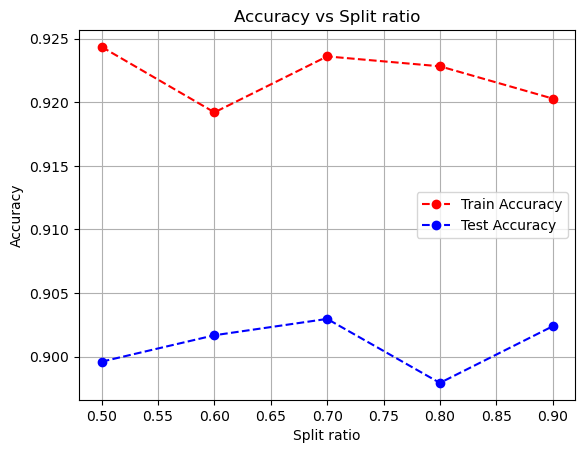

In [36]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(decision_tree,X,y,split_ratios)


<p> The accuracy plot above shows that best accuracy can be spotted on 70-30 splitting with 0.903. </p>

#### Training Data Evaluation

|Algorithm| Splitting|Training Acc|Training Precision|Training Recall|Training F1-score|
|--------------------|----------|-----|----|----|------|
|Decision Tree| 50-50|0.924|0.924|0.881|0.902|
|Decision Tree| 60-40|0.919|0.920|0.870|0.895|
|Decision Tree| 70-30|0.924|0.929|0.872|0.900|
|Decision Tree| 80-20|0.923|0.946|0.852|0.897|
|Decision Tree| 90-10|0.920|0.954|0.838|0.892|

#### Testing Data Evaluation
|Algorithm| Splitting| Testing Acc|Testing Precision|Testing Recall|Testing F1-score|
|--------------------|----------|-----|----|----|------|
|Decision Tree| 50-50|0.900|0.895|0.845|0.869
|Decision Tree| 60-40|0.902|0.892|0.854|0.872
|Decision Tree| 70-30|0.903|0.900|0.847|0.873
|Decision Tree| 80-20|0.898|0.914|0.818|0.863
|Decision Tree| 90-10|0.902|0.942|0.802|0.866

<p>The decision tree performed better with higher accuracy ranging from 0.898 to 0.903. This suggests that the model is good at classifying the dataset. This table also shows higher precision than recall suggesting the model is fairly good at predicting positive instances. </p>

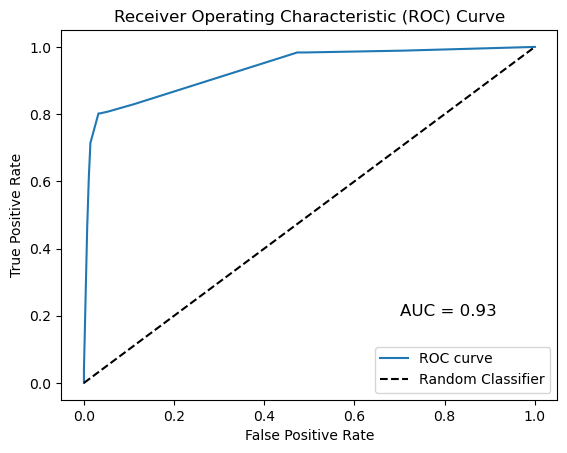

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])
y_prob = decision_tree.predict_probabilities(X_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pos)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob_pos)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

<p> Plotting ROC-AUC curve for Decision Tree algorithm </p>

## Comparing with sklearn Decision Tree

In [38]:
from sklearn import tree
sklearn_decisontree = tree.DecisionTreeClassifier(max_depth=5)

Split ratio:0.50
Train Accuracy: 0.928
Test Accuracy: 0.899
Train Precision: 0.936
Test Precision: 0.907
Train Recall: 0.877
Test Recall: 0.828
Train F1: 0.906
Test F1: 0.866
 

Split ratio:0.60
Train Accuracy: 0.921
Test Accuracy: 0.895
Train Precision: 0.926
Test Precision: 0.879
Train Recall: 0.870
Test Recall: 0.851
Train F1: 0.897
Test F1: 0.865
 

Split ratio:0.70
Train Accuracy: 0.924
Test Accuracy: 0.904
Train Precision: 0.958
Test Precision: 0.933
Train Recall: 0.844
Test Recall: 0.816
Train F1: 0.897
Test F1: 0.871
 

Split ratio:0.80
Train Accuracy: 0.923
Test Accuracy: 0.899
Train Precision: 0.949
Test Precision: 0.907
Train Recall: 0.851
Test Recall: 0.829
Train F1: 0.897
Test F1: 0.866
 

Split ratio:0.90
Train Accuracy: 0.923
Test Accuracy: 0.900
Train Precision: 0.951
Test Precision: 0.930
Train Recall: 0.847
Test Recall: 0.808
Train F1: 0.896
Test F1: 0.865
 



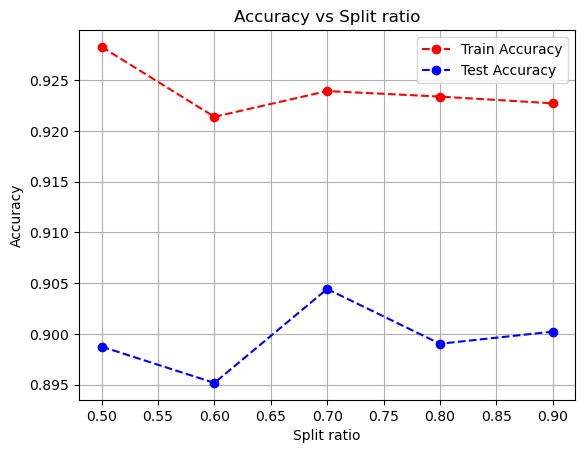

In [39]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(sklearn_decisontree,X,y,split_ratios)

<p> The graph above shows that the best splitting was 70-30 which also have achieved an accuracy of 0.924. </p>

#### Training Data Evaluation

|Algorithm| Splitting|Training Acc|Training Precision|Training Recall|Training F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Decision Tree| 50-50|0.928|0.936|0.877|0.906|
|Sklearn Decision Tree| 60-40|0.921|0.926|0.870|0.897|
|Sklearn Decision Tree| 70-30|0.924|0.958|0.844|0.897|
|Sklearn Decision Tree| 80-20|0.923|0.949|0.851|0.897|
|Sklearn Decision Tree| 90-10|0.923|0.951|0.847|0.896|

#### Testing Data Evaluation
|Algorithm| Splitting| Testing Acc|Testing Precision|Testing Recall|Testing F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Decision Tree| 50-50|0.899|0.907|0.828|0.866
|Sklearn Decision Tree| 60-40|0.895|0.879|0.851|0.865
|Sklearn Decision Tree| 70-30|0.904|0.933|0.816|0.871
|Sklearn Decision Tree| 80-20|0.899|0.907|0.829|0.866
|Sklearn Decision Tree| 90-10|0.900|0.930|0.808|0.865

<p>The table above shows the performance of Scikit-learn Decision Tree on different splitting ratios. Out of all the splitting ratios 70-30 splitting was the best ratio which scored 0.904 on accuracy, 0.933 on precision, 0.871 on F1-score. </p>

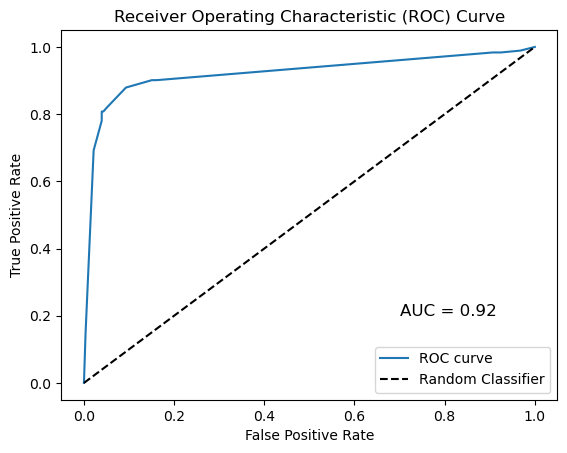

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score # import the roc_curve and roc_auc_score functions
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1]) 
y_prob = sklearn_decisontree.predict_proba(X_test) # using the predict_proba method to get the probabilities of each class
y_prob_pos = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pos) # calculate the false positive rate, true positive rate and thresholds

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob_pos)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

### Evaluating Decision Tree with Scikit-learn libary on test set with best splitting

|Algorithm| Splitting| Testing Acc|Testing Precision|Testing Recall|Testing F1-score|
|--------------------|----------|-----|----|----|------|
| Decision Tree| 70-30|0.903|0.900|0.847|0.873
|Sklearn Decision Tree| 70-30|0.904|0.933|0.816|0.871


<p>Based on the figures from the table it is difficult to judge which algorithm is better as my implementation does better in recall i.e. minimizing false negatives and has higher F1-score a combination of both precision and recall.</p>

### Naive Bayes Classifier from scikit learn


In [41]:
from sklearn.naive_bayes import GaussianNB # import the Gaussian Naive Bayes classifier


In [42]:
naive_bayes = GaussianNB() # create an instance of the classifier

Split ratio:0.50
Train Accuracy: 0.824
Test Accuracy: 0.817
Train Precision: 0.703
Test Precision: 0.698
Train Recall: 0.958
Test Recall: 0.946
Train F1: 0.811
Test F1: 0.803
 

Split ratio:0.60
Train Accuracy: 0.820
Test Accuracy: 0.823
Train Precision: 0.698
Test Precision: 0.708
Train Recall: 0.957
Test Recall: 0.938
Train F1: 0.807
Test F1: 0.807
 

Split ratio:0.70
Train Accuracy: 0.817
Test Accuracy: 0.820
Train Precision: 0.694
Test Precision: 0.700
Train Recall: 0.960
Test Recall: 0.949
Train F1: 0.805
Test F1: 0.806
 

Split ratio:0.80
Train Accuracy: 0.820
Test Accuracy: 0.833
Train Precision: 0.697
Test Precision: 0.715
Train Recall: 0.957
Test Recall: 0.959
Train F1: 0.807
Test F1: 0.819
 

Split ratio:0.90
Train Accuracy: 0.820
Test Accuracy: 0.807
Train Precision: 0.697
Test Precision: 0.684
Train Recall: 0.958
Test Recall: 0.951
Train F1: 0.807
Test F1: 0.795
 



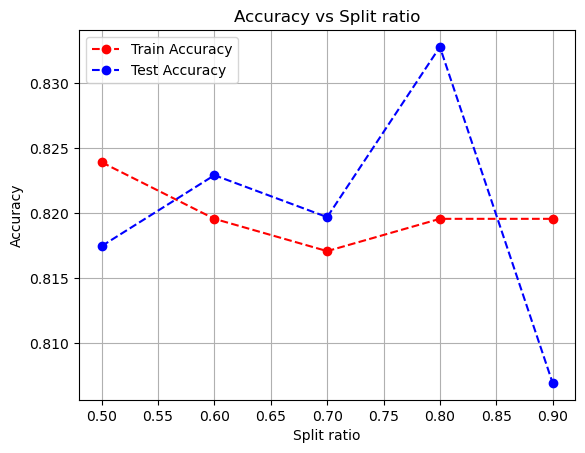

In [43]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(naive_bayes,X,y,split_ratios)

<p> The above graph shows the accuracy rate of Naive Bayes on training and test sets. The best accuracy was measured on 80-20 splitting with 0.833.</p>

#### Training Data Evaluation

|Algorithm| Splitting|Training Acc|Training Precision|Training Recall|Training F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Naive Bayes| 50-50|0.824|0.703|0.958|0.811|
|Sklearn Naive Bayes| 60-40|0.820|0.698|0.957|0.807|
|Sklearn Naive Bayes| 70-30|0.817|0.694|0.960|0.805|
|Sklearn Naive Bayes| 80-20|0.820|0.697|0.957|0.807|
|Sklearn Naive Bayes| 90-10|0.820|0.697|0.958|0.807|


#### Testing Data Evaluation
|Algorithm| Splitting| Testing Acc|Testing Precision|Testing Recall|Testing F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Naive Bayes| 50-50|0.817|0.698|0.946|0.803
|Sklearn Naive Bayes| 60-40|0.823|0.708|0.938|0.807
|Sklearn Naive Bayes| 70-30|0.820|0.700|0.949|0.806
|Sklearn Naive Bayes| 80-20|0.833|0.715|0.959|0.819
|Sklearn Naive Bayes| 90-10|0.807|0.684|0.951|0.795

<p> The table above shows the performance of Scikit-learn Naïve Bayes on test set with different split ratios. Among all the ratios, 80-20 splitting was the best with better accuracy score of 0.833, test precision at 0.715, 0.959 on recall, 0.819 on F1-score. </p>

(461,)
(461, 57)


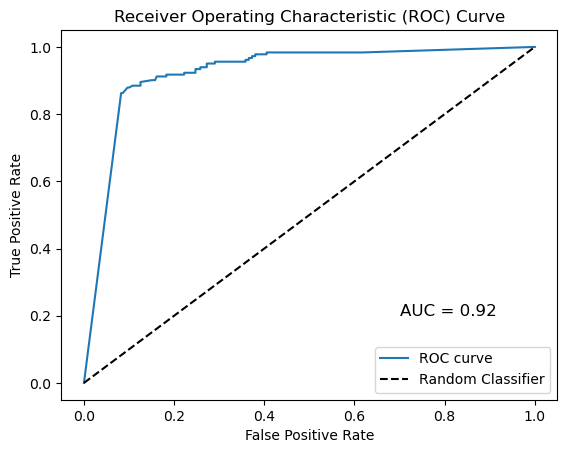

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])#uses the last splitting ratio
print(y_test.shape)
print(X_test.shape)
y_pred2 = naive_bayes.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred2)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

## Sklearn Random Forest 

In [45]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [46]:
Randomforest = RandomForestClassifier(n_estimators=100, max_depth=5) # create a random forest classifier with 100 trees and a max depth of 5

Split ratio:0.50
Train Accuracy: 0.938
Test Accuracy: 0.918
Train Precision: 0.964
Test Precision: 0.954
Train Recall: 0.876
Test Recall: 0.832
Train F1: 0.918
Test F1: 0.889
 

Split ratio:0.60
Train Accuracy: 0.941
Test Accuracy: 0.921
Train Precision: 0.970
Test Precision: 0.949
Train Recall: 0.877
Test Recall: 0.844
Train F1: 0.921
Test F1: 0.893
 

Split ratio:0.70
Train Accuracy: 0.934
Test Accuracy: 0.928
Train Precision: 0.962
Test Precision: 0.961
Train Recall: 0.867
Test Recall: 0.851
Train F1: 0.912
Test F1: 0.903
 

Split ratio:0.80
Train Accuracy: 0.937
Test Accuracy: 0.919
Train Precision: 0.966
Test Precision: 0.944
Train Recall: 0.870
Test Recall: 0.843
Train F1: 0.915
Test F1: 0.891
 

Split ratio:0.90
Train Accuracy: 0.933
Test Accuracy: 0.920
Train Precision: 0.959
Test Precision: 0.945
Train Recall: 0.868
Test Recall: 0.846
Train F1: 0.911
Test F1: 0.893
 



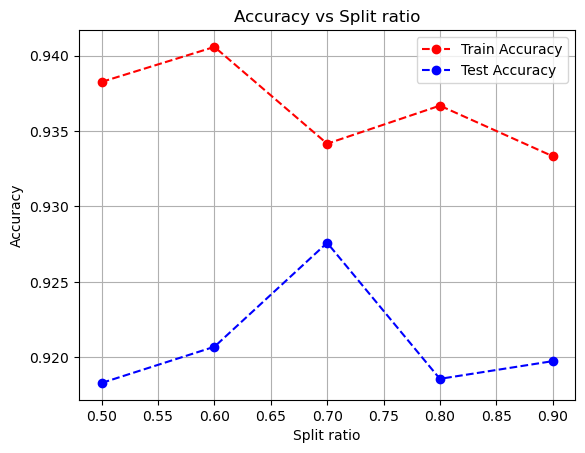

In [47]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9] # split ratios to use for training and testing
model_evaluation(Randomforest,X,y,split_ratios) # using the randomforest classifier to evaluate the model

#### Training Data Evaluation

|Algorithm| Splitting|Training Acc|Training Precision|Training Recall|Training F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Random Forest| 50-50|0.938|0.964|0.876|0.918|
|Sklearn Random Forest| 60-40|0.941|0.970|0.877|0.921|
|Sklearn Random Forest| 70-30|0.934|0.962|0.867|0.912|
|Sklearn Random Forest| 80-20|0.937|0.966|0.870|0.915|
|Sklearn Random Forest| 90-10|0.933|0.959|0.868|0.911|


#### Testing Data Evaluation
|Algorithm| Splitting| Testing Acc|Testing Precision|Testing Recall|Testing F1-score|
|--------------------|----------|-----|----|----|------|
|Sklearn Random Forest| 50-50|0.918|0.954|0.832|0.889
|Sklearn Random Forest| 60-40|0.921|0.949|0.844|0.893
|Sklearn Random Forest| 70-30|0.928|0.961|0.851|0.903
|Sklearn Random Forest| 80-20|0.919|0.944|0.843|0.891
|Sklearn Random Forest| 90-10|0.920|0.945|0.846|0.893

<p>According to the table above the best splitting ratio was at 70-30 splitting with 0.928 accuracy, 0.961 on precision, 0.851 on recall and 0.903 on F1-score. The higher precision score shows that the model is able to identify more positive instances correctly.</p>

(461,)
(461, 57)


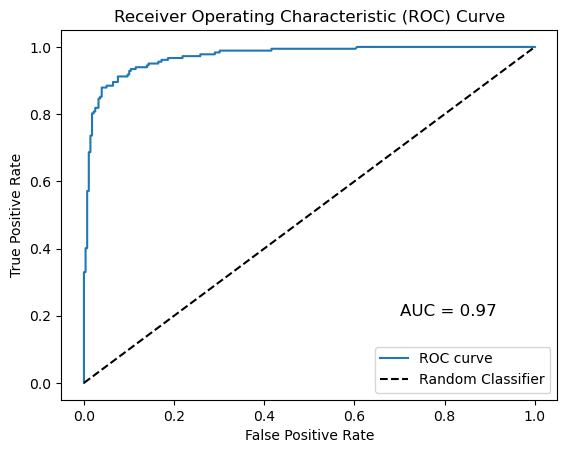

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])
print(y_test.shape)
print(X_test.shape)
y_pred2 = Randomforest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred2)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

<p> Higher AUC score is measured on Random Forest Classifier </p>

## Evaluating the best Algorithm among the six based on splitting, accuracy, precision, recall, f1-score on test set

|Algorithm| Best Splitting| Best Acc|Best Precision|Best Recall|Best F1-score|
|--------------------|-------|----------|-----|----|----|
|Sklearn Logistic Regression| 80-20|0.929|0.921|0.898|0.909
|Logistic Regression| 70-30|0.928|0.921|0.895|0.908
|Decision Tree| 70-30|0.903|0.900|0.847|0.873
|Sklearn Decision Tree| 70-30|0.904|0.933|0.816|0.871
|Sklearn Naive Bayes| 80-20|0.833|0.715|0.959|0.819
|Sklearn Random Forest| 70-30|0.928|0.961|0.851|0.903



<p> There are two algorithms which have better performance metrics, they are Random Forest and Logistic Regression. Both implementations are done with help of scikit-learn libary. Logistic Regression has better balance in accuracy and F1-score whereas Random Forest has better precision on minimising the false positives. Out of the two algorithms I have chosen Logistic Regression because it scores better in two evaluation metric and is more balanced</p>